In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('predictive_maintenance.csv')

In [48]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [49]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

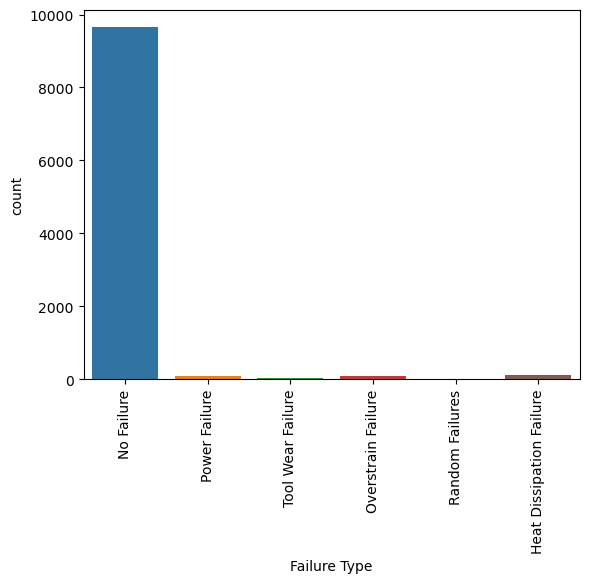

In [50]:
sns.countplot(data=df, x='Failure Type')
plt.xticks(rotation=90);

In [51]:
df.value_counts('Failure Type')

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

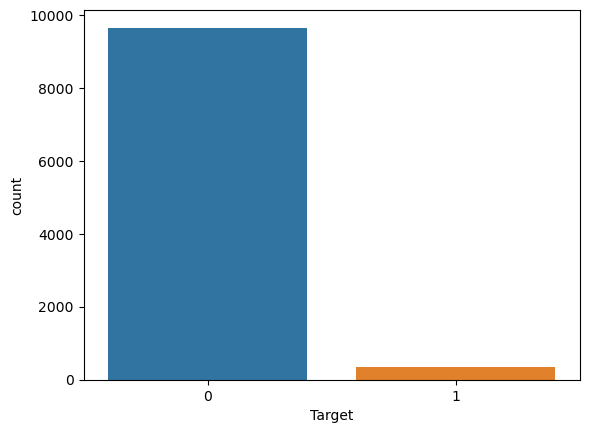

In [52]:
sns.countplot(data=df, x='Target')

In [53]:
df.value_counts('Target')

Target
0    9661
1     339
dtype: int64

In [54]:
pd.get_dummies(data=df[['Type', 'Failure Type']], drop_first=True)

,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,0,0
3,1,0,1,0,0,0,0
4,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,0,0,0,0
9996,0,0,1,0,0,0,0
9997,0,1,1,0,0,0,0
9998,0,0,1,0,0,0,0


In [40]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [55]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [74]:
X = pd.get_dummies(data=df.drop(['Target', 'Failure Type', 'UDI', 'Product ID'], axis=1))
# y = pd.get_dummies(data=df['Failure Type'])
y = df['Failure Type']

In [76]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(X_train)

StandardScaler()

In [84]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [109]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [116]:
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,scaled_X_test,y_test)
    plt.xticks(rotation=90);

In [101]:
from sklearn.linear_model import LogisticRegressionCV

In [102]:
log_model = LogisticRegressionCV()

In [103]:
log_model.fit(scaled_X_train, y_train)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chour\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()

C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.72      0.52      0.61        44
              No Failure       0.98      1.00      0.99      2888
      Overstrain Failure       0.77      0.74      0.76        23
           Power Failure       0.96      0.82      0.88        28
         Random Failures       0.00      0.00      0.00         3
       Tool Wear Failure       0.00      0.00      0.00        14

                accuracy                           0.98      3000
               macro avg       0.57      0.51      0.54      3000
            weighted avg       0.97      0.98      0.98      3000



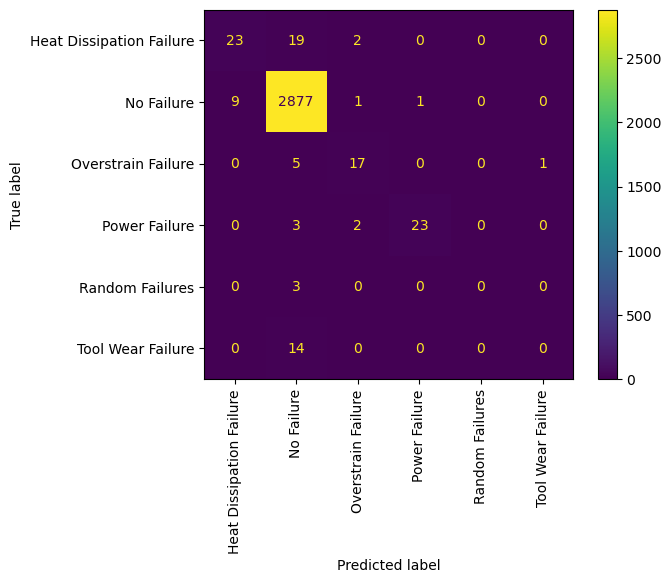

In [117]:
report(log_model)

In [118]:
from sklearn.svm import SVC

In [119]:
svc_model = SVC()

In [120]:
svc_model.fit(scaled_X_train, y_train)

SVC()

C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.00      0.00      0.00        44
              No Failure       0.97      1.00      0.98      2888
      Overstrain Failure       0.60      0.26      0.36        23
           Power Failure       0.90      0.32      0.47        28
         Random Failures       0.00      0.00      0.00         3
       Tool Wear Failure       0.00      0.00      0.00        14

                accuracy                           0.97      3000
               macro avg       0.41      0.26      0.30      3000
            weighted avg       0.95      0.97      0.95      3000



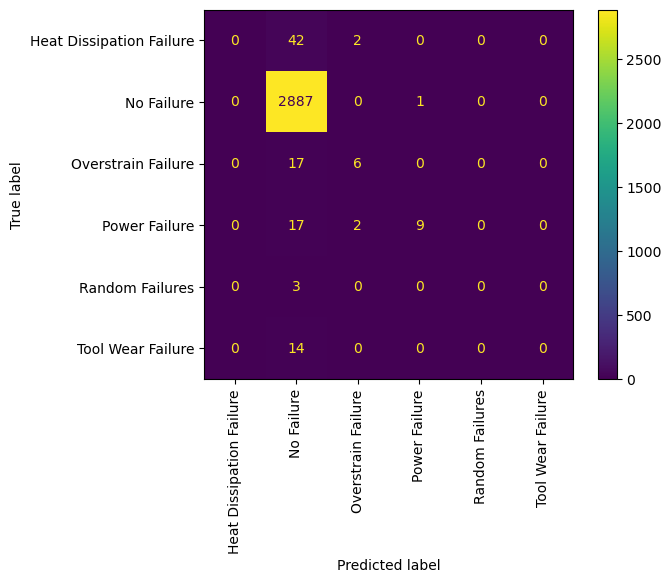

In [121]:
report(svc_model)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
tree_model = RandomForestClassifier(n_estimators=6)

In [124]:
tree_model.fit(scaled_X_train, y_train)

RandomForestClassifier(n_estimators=6)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chour\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.83      0.68      0.75        44
              No Failure       0.98      1.00      0.99      2888
      Overstrain Failure       0.50      0.17      0.26        23
           Power Failure       0.89      0.57      0.70        28
         Random Failures       0.00      0.00      0.00         3
       Tool Wear Failure       0.00      0.00      0.00        14

                accuracy                           0.98      3000
               macro avg       0.53      0.40      0.45      3000
            weighted avg       0.97      0.98      0.97      3000



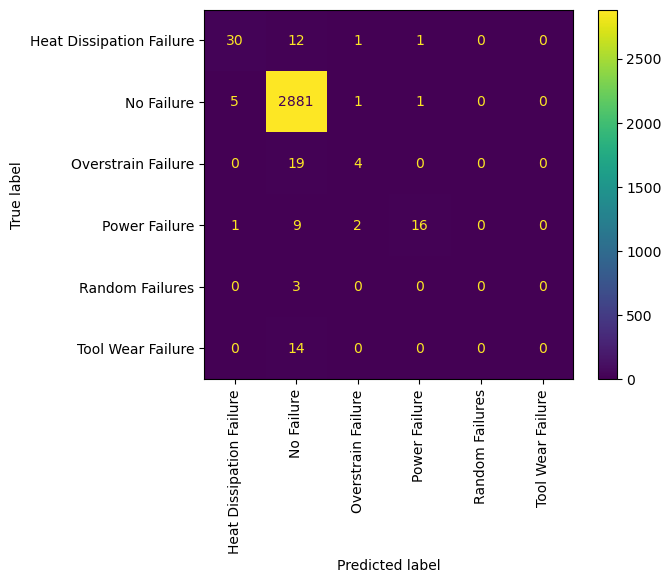

In [125]:
report(tree_model)

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
n_estimators = [50, 100, 150, 200]
max_features = ['sqrt', 'log2']
criterion = ['gini', 'entropy', 'log_loss']
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'criterion': criterion,
             'bootstrap': bootstrap}

In [128]:
grid_model = GridSearchCV(RandomForestClassifier(), param_grid)

In [129]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chour\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chour\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\chour\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\chour\anaconda3\lib\site-packages\j

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [130]:
grid_model.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 200}

In [136]:
scaled_X = scaler.transform(X)

In [152]:
final_model = RandomForestClassifier(n_estimators=200, max_features='log2', criterion='gini')
final_model.fit(X, y)

RandomForestClassifier(max_features='log2', n_estimators=200)

In [153]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


In [156]:
y

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 10000, dtype: object

In [157]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [154]:
new_data = np.array([200, 240, 1400, 55, 2, 0, 0, 1]).reshape(1, -1)
final_model.predict(new_data)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No Failure'], dtype=object)

In [155]:
new_data = [[298.1, 308.6, 1551, 42.8, 0, 0, 0, 1]]
final_model.predict(new_data)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No Failure'], dtype=object)

In [160]:
new_data = [[298.9, 309.1, 2861, 4.6, 143, 0, 1, 0]]
final_model.predict(new_data)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Power Failure'], dtype=object)

In [161]:
import joblib

In [162]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [164]:
list(X.columns)

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Type_H',
 'Type_L',
 'Type_M']

In [165]:
joblib.dump(list(X.columns), 'column_name.pkl')

['column_name.pkl']